In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
folder = '/slope/h5/'

Here we extract the discharge and flow density for each point of the grid and at given timesteps

In [131]:
def extract_disch(fold,init,end,increment):
    xx=[]
    yy=[]
    for i in range (init,end,increment):
        filename=fold+'flow.time'+str(i)+'.p0.hdf5'
        f = h5py.File(filename, 'r')
        dset1 = f['discharge']
        dset2 = f['flowdensity']
        n=-1
        for element in dset1:
            n=n+1
            k=dset2[n][0]
            if element[0]>0.5:
                if k>1.0001:
                    xx.append(element[0])
                    yy.append(k)
    return (xx,yy)

Take the decimal log and make linear regression to determine a and b parameters
such as Sediment_concentration (kg/m3) = a. Discharge (m3/s)^b
See Syvitski et al., 2000,Estimating fluvial sediment transport: The rating parameters; Water Ressources Research

In [ ]:
(disch,Cs)=extract_disch(folder,20,40,2)
Logdisch=np.log10(np.array(disch))
LogCs=np.log10((np.array(Cs)-1)*1000)

In [132]:
def linear_regression(x,y):
    sumx=np.sum(x)
    sumy=np.sum(y)
    meanx=np.mean(x)
    meany=np.mean(y)
    beta_0_1=0
    beta_0_2=0
    for i in range (0,len(y)):
        beta_0_1=beta_0_1+(x[i]-meanx)*(y[i]-meany)
        beta_0_2=beta_0_2+(x[i]-meanx)**2
    beta_0=beta_0_1/beta_0_2
    beta_1=meany-beta_0*meanx
    return (beta_0,beta_1)

1.49445511792 -0.606243893658


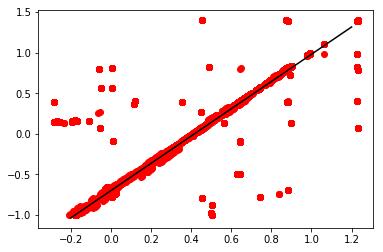

In [141]:
(b0,b1) = linear_regression(Logdisch,LogCs)
print (b0,b1)
xmod=np.array([-0.2,0.5,1.2])
ymod=b1+b0*xmod
plt.plot(Logdisch,LogCs,'ro')
plt.plot(xmod,ymod,'k')
plt.xlabel ('Log10 Discharge in m3/s')
plt.ylabel ('Log10 Sediment load in kg/m3')
plt.show()